### The Acetone synthesis

1. Cumene hydroperoxide decomposition\
CC(C)(OO)c1ccccc1>acid>CC(=O)C
2. Isopropanol dehydrogenation\
CC(O)C>Cu>CC(=O)C
3. Propene hydration/oxidation\
{2}C=CC.O=O>Pd/Cu>{2}CC(=O)C

In [1]:
from rxnSMILES4AtomEco import atom_economy

# calculate Verbose mode
atom_economy("{2}C=CC.O=O>Pd/Cu>{2}CC(=O)C")


 Atom Economy Calculation: 

--------------------------------------------------
                     REACTANTS                    
..................................................
 SMILES:             C=CC
 Molecular Formula:  C3H6
 Molecular Weight:   42.08 g/mol
 Coefficient:        2.0
..................................................
 SMILES:             O=O
 Molecular Formula:  O2
 Molecular Weight:   32.00 g/mol
 Coefficient:        1.0
--------------------------------------------------
--------------------------------------------------
                     PRODUCTS                     
..................................................
 SMILES:             CC(C)=O
 Molecular Formula:  C3H6O
 Molecular Weight:   58.08 g/mol
 Coefficient:        2.0
--------------------------------------------------

 Atom Economy:       100.00%                        



In [43]:
reactions_smiles_pathway = {
    "CC(C)(OO)c1ccccc1>acid>CC(=O)C": "Cumene",  # Cumene hydroperoxide decomposition
    "CC(O)C>Cu>CC(=O)C": "Isopropanol",          # Isopropanol dehydrogenation
    "{2}C=CC.O=O>Pd/Cu>{2}CC(=O)CC": "Propene"   # Propene oxidation
}

In [44]:
from rxnSMILES4AtomEco import get_atom_economy

# Store results
results_paths = {}

# Loop through pathways and calculate atom economy
for smiles, name in reactions_smiles_pathway.items():
    results_paths[name] = get_atom_economy(smiles)

# Print results
for pathway, value in results_paths.items():
    print(f"{value:.2f}% {pathway}")


38.16% Cumene
96.65% Isopropanol
124.15% Propene


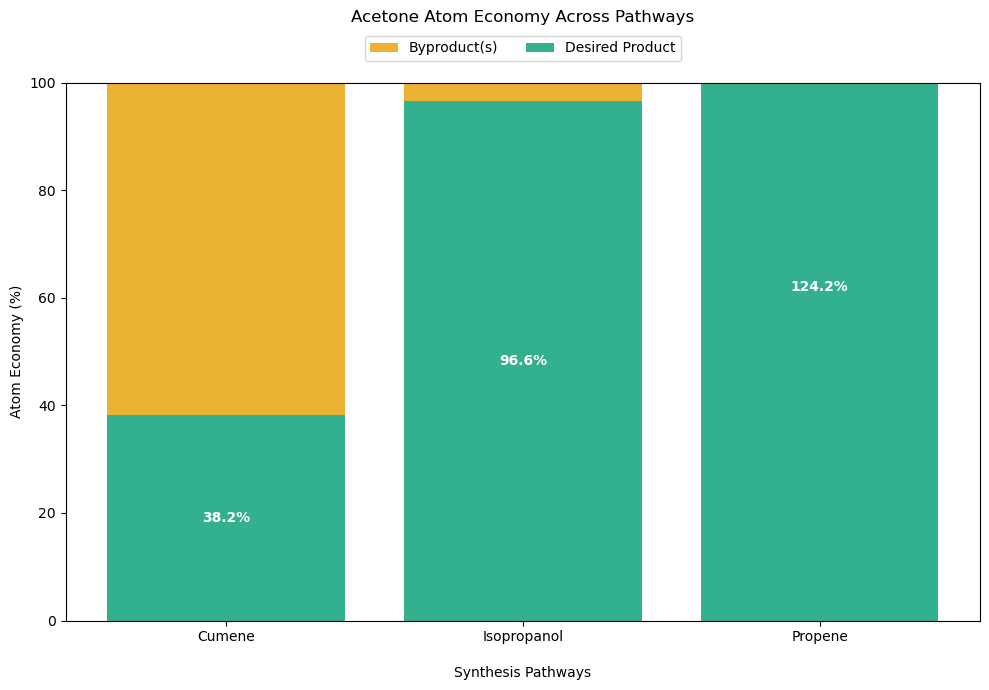

In [58]:
import matplotlib.pyplot as plt

# Extract labels (pathway names) and values (atom economy)
pathways = list(results_paths.keys())  # Labels for x-axis
atom_economy_values = list(results_paths.values())  # Y-axis values

# Calculate byproducts as (100 - atom economy)
byproduct_values = [100 - value for value in atom_economy_values]

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 7))  # Single axis for both plots

# Plot bars: green for desired product, orange for byproducts
bars = ax.bar(pathways, atom_economy_values, color='#009E73', label="Desired Product", alpha=0.8)
ax.bar(pathways, byproduct_values, bottom=atom_economy_values, color='#E69F00', label="Byproduct(s)", alpha=0.8)

# Annotate bars with atom economy percentages
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height/2, f'{height:.1f}%', 
            ha='center', va='center', color='white', fontweight='bold')

# Titles & labels
ax.set_title("Acetone Atom Economy Across Pathways\n\n\n")
ax.set_xlabel("\nSynthesis Pathways")
ax.set_ylabel("Atom Economy (%)")
ax.set_ylim(0, 100)  # Limit y-axis to 100%

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2,reverse=True)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

#save_path = '/tmp/acetone_histogram.png'  # Writable on many systems
#plt.draw()  # Force render
#print(f"Saving to: {save_path}")
#plt.savefig(save_path, dpi=900, bbox_inches='tight')
#plt.close()
#print("Save completed (check directory).")